## Correlation Analysis

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

### Precipitation

In [2]:
#total field
f='/project/xprecip/merra2_ncfiles/precip/resampled/precip_correct_dailyresample_10-6-22.nc'
DS_precip_totalfield=xr.open_dataset(f)
lat_precip=DS_precip_totalfield['lat']
lon_precip=DS_precip_totalfield['lon']
total_precip_field=DS_precip_totalfield['PRECTOTCORR']
total_precip_field

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [4]:
#Normalized Anomalies
f='/project/xprecip/merra2_ncfiles/precip/anomalies/daily_precip_norm_anoms_noshift_10-6-22.nc'
DS_precip=xr.open_dataset(f)
lat_precip=DS_precip['lat']
lon_precip=DS_precip['lon']
norm_precip_anoms=DS_precip['PRECTOTCORR']
norm_precip_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 ...

In [5]:
#Non-normalized anomalies
f='/project/xprecip/merra2_ncfiles/precip/anomalies/daily_precip_anoms_nonorm_noshift_10-6-22.nc'
DS_precip_nonorm=xr.open_dataset(f)
lat_precip=DS_precip_nonorm['lat']
lon_precip=DS_precip_nonorm['lon']
precip_anoms=DS_precip_nonorm['PRECTOTCORR']
precip_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 ...

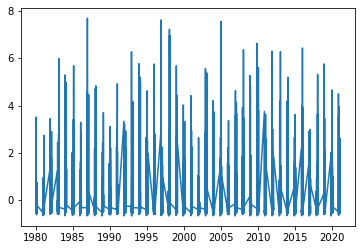

In [6]:
dc_norm_precip=norm_precip_anoms.sel(lat=39,lon=-77,method='nearest')
plt.plot(dc_norm_precip['time'],dc_norm_precip)

In [7]:
std=dc_norm_precip.std(dim='time')
std

<xarray.DataArray 'PRECTOTCORR' ()>
array(1.00000012)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0

### Vorticity

In [3]:
#total field
f='/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_daily_resampled_full_9-27-22.nc'
DS_vort_totalfield=xr.open_dataset(f)
lat_vort=DS_vort_totalfield['lat']
lon_vort=DS_vort_totalfield['lon']
vort_totalfield=DS_vort_totalfield['__xarray_dataarray_variable__']
vort_totalfield

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [9]:
#Normalized Anomalies
f='/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_norm_anoms_traditional.nc'
DS_vort=xr.open_dataset(f)
lat_vort=DS_vort['lat']
lon_vort=DS_vort['lon']
norm_vort_anoms=DS_vort['__xarray_dataarray_variable__']
norm_vort_anoms

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
    dayofyear  (time) int64 ...

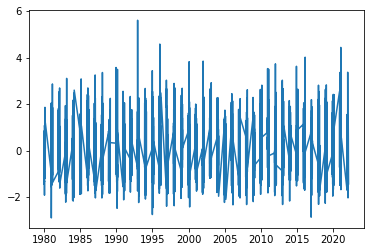

In [14]:
dc_norm_vort=norm_vort_anoms.sel(lat=39,lon=-77,method='nearest')
plt.plot(dc_norm_vort['time'],dc_norm_vort)

In [15]:
std=dc_norm_vort.std(dim='time')
std

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(1.)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0

In [10]:
#Non-normalized anomalies
f='/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_anoms_traditional_nonorm.nc'
DS_vort_nonorm=xr.open_dataset(f)
lat_vort=DS_vort_nonorm['lat']
lon_vort=DS_vort_nonorm['lon']
vort_anoms=DS_vort_nonorm['__xarray_dataarray_variable__']
vort_anoms

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
    dayofyear  (time) int64 ...

### Time series for Washington, DC

In [11]:
dc_precip=norm_precip_anoms.sel(lat=39,lon=-77,method='nearest')
dc_precip

<xarray.DataArray 'PRECTOTCORR' (time: 3760)>
array([-0.299382, -0.369483, -0.389501, ..., -0.319582,  1.064301,  2.306805],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
    lon        float64 -76.88
    lat        float64 39.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [12]:
dc_precip_nonorm=precip_anoms.sel(lat=39,lon=-77,method='nearest')
dc_vort_nonorm=vort_anoms.sel(lat=39,lon=-77,method='nearest')

In [13]:
dc_vort=norm_vort_anoms.sel(lat=39,lon=-77,method='nearest')
dc_vort

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850)>
array([-1.443469, -1.434887,  0.355581, ..., -0.835239, -1.098419, -1.429078])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon        float64 -76.88
    lat        float64 39.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

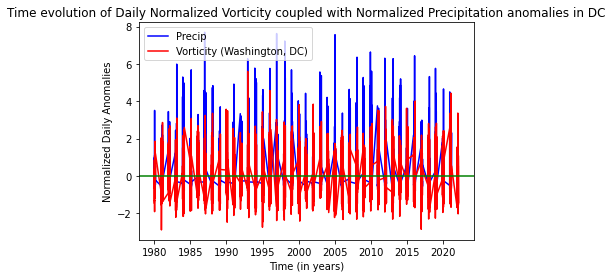

In [14]:
plt.plot(dc_precip['time'],dc_precip,'b')
plt.plot(dc_vort['time'],dc_vort,'r')
plt.legend(['Precip','Vorticity (Washington, DC)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Daily Anomalies')
plt.title('Time evolution of Daily Normalized Vorticity coupled with Normalized Precipitation anomalies in DC')
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_vortanoms_corr_daily',bbox_inches='tight')

Text(0.5, 1.0, 'Time evolution of Daily Normalized Vorticity coupled with Normalized Precipitation anomalies in DC (DJF 2010-2011)')

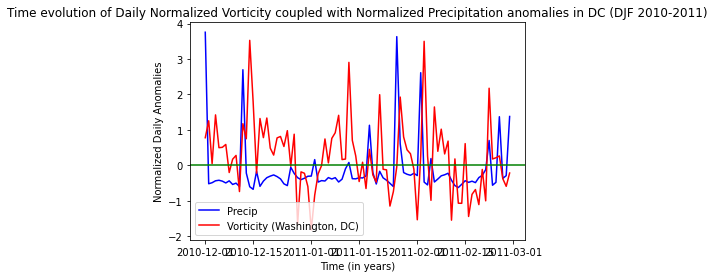

In [15]:
#smaller
dc_precip_smaller=dc_precip.loc['2010-12-01':'2011-02-28']
dc_vort_smaller=dc_vort.loc['2010-12-01':'2011-02-28']
plt.plot(dc_precip_smaller['time'],dc_precip_smaller,'b')
plt.plot(dc_vort_smaller['time'],dc_vort_smaller,'r')
plt.legend(['Precip','Vorticity (Washington, DC)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Daily Anomalies')
plt.title('Time evolution of Daily Normalized Vorticity coupled with Normalized Precipitation anomalies in DC (DJF 2010-2011)')


In [16]:
#Total field with anomalies
dc_precip_total=total_precip_field.sel(lat=39,lon=-77,method='nearest')
#dc_precip_total
dc_vort_total=vort_totalfield.sel(lat=39,lon=-77,method='nearest')
#dc_vort_total

Text(0.5, 1.0, 'Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in DC')

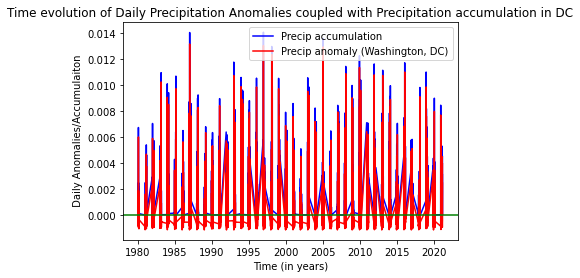

In [25]:
plt.plot(dc_precip_total['time'],dc_precip_total,'b')
plt.plot(dc_precip_nonorm['time'],dc_precip_nonorm,'r')
plt.legend(['Precip accumulation','Precip anomaly (Washington, DC)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel(' Daily Anomalies/Accumulaiton')
plt.title('Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in DC')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_vortanoms_corr_daily',bbox_inches='tight')

Text(0.5, 1.0, 'Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in DC (DJF 2010-2011)')

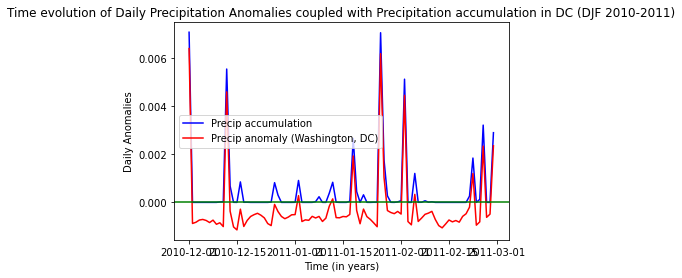

In [26]:
#smaller
dc_anomaly_smaller=dc_precip_nonorm.loc['2010-12-01':'2011-02-28']
dc_preciptotal_smaller=dc_precip_total.loc['2010-12-01':'2011-02-28']
plt.plot(dc_preciptotal_smaller['time'],dc_preciptotal_smaller,'b')
plt.plot(dc_anomaly_smaller['time'],dc_anomaly_smaller,'r')
plt.legend(['Precip accumulation','Precip anomaly (Washington, DC)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Daily Anomalies')
plt.title('Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in DC (DJF 2010-2011)')


In [27]:
nyc_precip_nonorm=precip_anoms.sel(lat=40.8,lon=-74,method='nearest')
nyc_precip_total=total_precip_field.sel(lat=40.8,lon=-74,method='nearest')

Text(0.5, 1.0, 'Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in NYC')

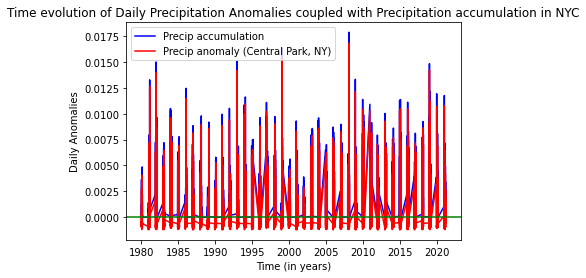

In [28]:
plt.plot(nyc_precip_total['time'],nyc_precip_total,'b')
plt.plot(nyc_precip_nonorm['time'],nyc_precip_nonorm,'r')
plt.legend(['Precip accumulation','Precip anomaly (Central Park, NY)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Daily Anomalies')
plt.title('Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in NYC')

Text(0.5, 1.0, 'Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in NYC (DJF 2010-2011)')

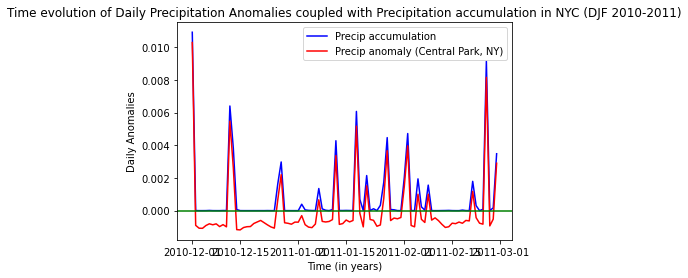

In [29]:
#smaller
nyc_anomaly_smaller=nyc_precip_nonorm.loc['2010-12-01':'2011-02-28']
nyc_preciptotal_smaller=nyc_precip_total.loc['2010-12-01':'2011-02-28']
plt.plot(nyc_preciptotal_smaller['time'],nyc_preciptotal_smaller,'b')
plt.plot(nyc_anomaly_smaller['time'],nyc_anomaly_smaller,'r')
plt.legend(['Precip accumulation','Precip anomaly (Central Park, NY)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Daily Anomalies')
plt.title('Time evolution of Daily Precipitation Anomalies coupled with Precipitation accumulation in NYC (DJF 2010-2011)')


In [30]:
conus_daily_corr=xr.corr(precip_anoms,vort_anoms,dim='time')
conus_daily_corr

<xarray.DataArray (lat: 52, lon: 106)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.07361989, 0.08056776, ..., 0.01931208, 0.00172366,
        0.00903235],
       [       nan, 0.0714568 , 0.08156771, ..., 0.04021856, 0.03384788,
        0.01656124],
       ...,
       [       nan, 0.18062433, 0.12425187, ..., 0.12252301, 0.10865496,
        0.12336993],
       [       nan, 0.0952977 , 0.11674729, ..., 0.1126858 , 0.10276011,
        0.10153417],
       [       nan, 0.03740036, 0.16886924, ..., 0.07164537, 0.06841817,
        0.0733948 ]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


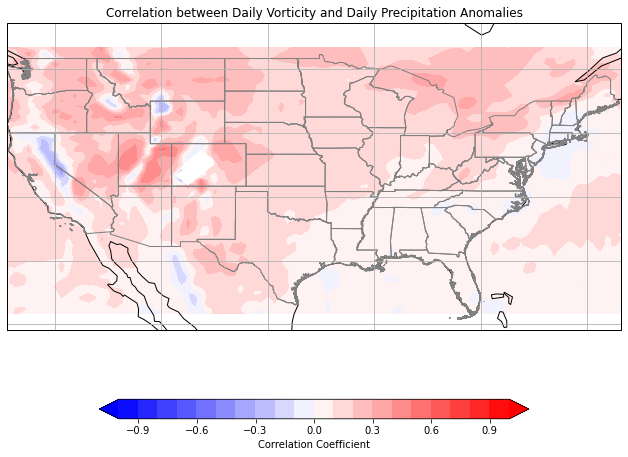

In [31]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=conus_daily_corr

# Make a filled contour plot
cs=ax.contourf(conus_daily_corr['lon'],conus_daily_corr['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Daily Vorticity and Daily Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_daily')

### check to see if anomalies are well correlated to total fields (they should be!)

In [33]:
precip_fields_corr=xr.corr(precip_anoms,total_precip_field,dim='time')
precip_fields_corr

<xarray.DataArray 'PRECTOTCORR' (lat: 55, lon: 107)>
array([[0.99303465, 0.99240331, 0.99263311, ..., 0.98474507, 0.98613829,
        0.98683951],
       [0.99281561, 0.99229635, 0.99222446, ..., 0.98412894, 0.98416132,
        0.98561163],
       [0.99197133, 0.99212684, 0.99225814, ..., 0.98439994, 0.98385637,
        0.98528815],
       ...,
       [0.98961451, 0.99065866, 0.99105437, ..., 0.99464991, 0.99486647,
        0.99504489],
       [0.98948217, 0.99028203, 0.99048802, ..., 0.99449165, 0.99473819,
        0.9947328 ],
       [0.98841384, 0.98958677, 0.99083703, ..., 0.99361941, 0.99377323,
        0.99397788]])
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

Text(0.5, 1.0, 'Correlation between Daily Precipitation Totals and Daily Precipitation Anomalies')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


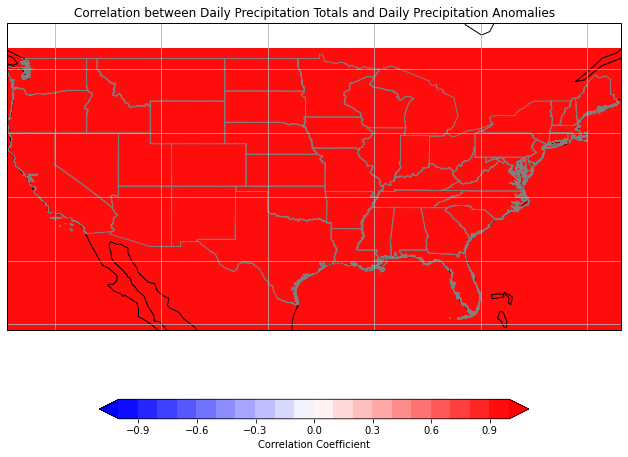

In [34]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=precip_fields_corr

# Make a filled contour plot
cs=ax.contourf(precip_fields_corr['lon'],precip_fields_corr['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Daily Precipitation Totals and Daily Precipitation Anomalies')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_daily')

In [35]:
vort_fields_corr=xr.corr(vort_anoms,vort_totalfield,dim='time')
vort_fields_corr

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.99380053, 0.99361917, ..., 0.98597189, 0.98465262,
               nan],
       [       nan, 0.99385721, 0.99380055, ..., 0.98823894, 0.98614495,
               nan],
       ...,
       [       nan, 0.99142846, 0.98999416, ..., 0.9942816 , 0.99371039,
               nan],
       [       nan, 0.99107927, 0.99033075, ..., 0.99451571, 0.99301874,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

Text(0.5, 1.0, 'Correlation between Daily Mean Vorticity and Daily Vorticity Anomalies')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


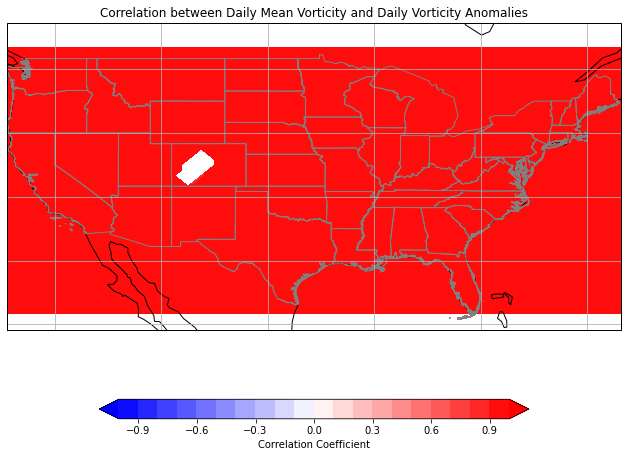

In [36]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=vort_fields_corr

# Make a filled contour plot
cs=ax.contourf(vort_fields_corr['lon'],vort_fields_corr['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Daily Mean Vorticity and Daily Vorticity Anomalies')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_daily')

### Significance for correlation

In [37]:
vort_anoms_sliced=vort_anoms.sel(time=slice('1980-01-01','2021-02-28')).fillna(0)
vort_anoms_sliced

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 53, lon: 113)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  6.76107734e-06,  7.78896974e-06, ...,
          8.32079936e-06,  1.09103005e-05,  0.00000000e+00],
        [ 0.00000000e+00,  6.41076958e-06,  7.89072400e-06, ...,
          3.88280579e-06,  5.90543464e-06,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.80647592e-05,  2.84598033e-05, ...,
         -2.66623268e-05, -2.64799682e-05,  0.00000000e+00],
        [ 0.00000000e+00,  2.40219430e-05,  2.24743591e-05, ...,
         -2.57971477e-05, -2.41500425e-05,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.11421567e-05, -1.35595769e-05, ...,
          1.60703297e-05,  2.47753596e-05,  0.00000000e+00],
        [ 0.00000000e+00, -1.17116444e-05, -1.27742428e-05, ...,
          1.26494409e-05,  2.29025933e-05,  0.00000000e+00],
...
        [ 0.00000000e+00,  4.81630050e-05,  3.66309251e-05, ...,
          1.83980993e-05,  1.04817904e-05,  0.00000000e+00],
        [ 0.00000000e+00,  3.20184046e-05,  3.14358705e-05, ...,
          1.82112449e-05,  9.93746454e-06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.39574789e-06,  1.76635589e-06, ...,
          3.78544184e-06,  3.69266897e-06,  0.00000000e+00],
        [ 0.00000000e+00,  1.21804889e-05,  1.43157343e-05, ...,
          5.08986277e-06,  1.01319369e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00, -5.09175501e-06, -5.18187815e-05, ...,
          7.79532626e-06,  5.05373491e-06,  0.00000000e+00],
        [ 0.00000000e+00, -5.13319290e-05, -5.48486758e-05, ...,
         -1.88404651e-05, -1.59542013e-05,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [38]:
vort_lons_shorter=vort_anoms_sliced.lon[3:-4]
vort_lons_shorter

<xarray.DataArray 'lon' (lon: 106)>
array([-124.375, -123.75 , -123.125, -122.5  , -121.875, -121.25 , -120.625,
       -120.   , -119.375, -118.75 , -118.125, -117.5  , -116.875, -116.25 ,
       -115.625, -115.   , -114.375, -113.75 , -113.125, -112.5  , -111.875,
       -111.25 , -110.625, -110.   , -109.375, -108.75 , -108.125, -107.5  ,
       -106.875, -106.25 , -105.625, -105.   , -104.375, -103.75 , -103.125,
       -102.5  , -101.875, -101.25 , -100.625, -100.   ,  -99.375,  -98.75 ,
        -98.125,  -97.5  ,  -96.875,  -96.25 ,  -95.625,  -95.   ,  -94.375,
        -93.75 ,  -93.125,  -92.5  ,  -91.875,  -91.25 ,  -90.625,  -90.   ,
        -89.375,  -88.75 ,  -88.125,  -87.5  ,  -86.875,  -86.25 ,  -85.625,
        -85.   ,  -84.375,  -83.75 ,  -83.125,  -82.5  ,  -81.875,  -81.25 ,
        -80.625,  -80.   ,  -79.375,  -78.75 ,  -78.125,  -77.5  ,  -76.875,
        -76.25 ,  -75.625,  -75.   ,  -74.375,  -73.75 ,  -73.125,  -72.5  ,
        -71.875,  -71.25 ,  -70.625,  -70.   ,  -69.375,  -68.75 ,  -68.125,
        -67.5  ,  -66.875,  -66.25 ,  -65.625,  -65.   ,  -64.375,  -63.75 ,
        -63.125,  -62.5  ,  -61.875,  -61.25 ,  -60.625,  -60.   ,  -59.375,
        -58.75 ])
Coordinates:
  * lon      (lon) float64 -124.4 -123.8 -123.1 -122.5 ... -60.0 -59.38 -58.75
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [39]:
vort_lats_shorter=vort_anoms_sliced.lat[:-1]
vort_lats_shorter

<xarray.DataArray 'lat' (lat: 52)>
array([24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. ,
       30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. ,
       36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. ,
       42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. ,
       48.5, 49. , 49.5, 50. ])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [40]:
new_vort=vort_anoms_sliced.where(vort_anoms_sliced['lon']==vort_lons_shorter)
final_vort=new_vort.where(vort_anoms_sliced['lat']==vort_lats_shorter)
final_vort

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 52, lon: 106)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.04360335e-05,  1.48604178e-05,  2.05650922e-05, ...,
          1.45917485e-06,  1.30481254e-06,  3.45440592e-06],
        [ 8.26507888e-06,  1.00502310e-05,  1.43276215e-05, ...,
          1.62258143e-06,  3.74299311e-07,  1.16690668e-06],
        ...,
        [ 2.53708952e-05,  2.93610266e-05,  3.01078110e-05, ...,
          2.89424598e-05,  2.32454335e-05,  1.58051448e-05],
        [ 2.53588517e-05,  6.24993155e-08, -1.10631495e-05, ...,
          1.42750808e-05,  1.24522940e-06, -1.17438768e-05],
        [-1.02275803e-06, -1.62844096e-05, -2.83037573e-05, ...,
         -4.16451729e-06, -1.81674231e-05, -2.54716381e-05]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.19483904e-05, -7.04734906e-06,  1.40311436e-07, ...,
          7.00129112e-07,  2.72860260e-06,  3.08934438e-06],
        [-1.02401960e-05, -2.57945440e-06,  8.46354644e-06, ...,
         -1.87409358e-06, -4.09343869e-07, -2.75659580e-07],
...
        [ 6.41207087e-05,  6.41233226e-05,  5.64658995e-05, ...,
         -4.10903460e-05, -3.78584800e-05, -1.68894324e-05],
        [ 5.20262729e-05,  6.75108797e-05,  4.26704265e-05, ...,
         -3.69257459e-05, -3.53416946e-05, -1.97648371e-05],
        [ 4.10480838e-05,  3.34869398e-05,  1.15252025e-05, ...,
         -3.01533795e-05, -2.80333230e-05, -1.66215909e-05]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.52471513e-06,  7.03043215e-06,  7.96854662e-06, ...,
          4.64329832e-06,  4.78448023e-06,  6.69479957e-06],
        [ 1.56340560e-05,  1.57517156e-05,  1.36398101e-05, ...,
          9.28103342e-06,  1.29421625e-05,  9.61918454e-06],
        ...,
        [-3.14205478e-05, -5.36269241e-05, -4.08519657e-05, ...,
          6.04578987e-06,  2.95867250e-05,  5.04181503e-05],
        [-5.77779849e-05, -2.08733655e-05, -1.30058082e-05, ...,
         -1.80410575e-05, -4.36035880e-06,  9.68762679e-06],
        [-2.51410833e-05, -7.88074466e-06, -1.48032741e-05, ...,
         -3.25726186e-05, -3.16544887e-05, -2.93756528e-05]]])
Coordinates:
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0
  * lon        (lon) float64 -124.4 -123.8 -123.1 -122.5 ... -60.0 -59.38 -58.75
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [41]:
precip_anoms_nonans=precip_anoms.fillna(0)
precip_anoms_nonans

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-3.8386785e-04, -3.9331309e-04, -3.9051252e-04, ...,
          7.2843308e-05, -2.8975119e-05, -6.1816900e-05],
        [-3.6285678e-04, -3.3684864e-04, -3.5258068e-04, ...,
          1.1246375e-04, -4.6422356e-05, -5.3014519e-05],
        [-3.1366679e-04, -3.0003834e-04, -3.1892757e-04, ...,
          1.7231907e-04,  1.7463419e-05, -2.5009344e-05],
        ...,
        [-1.8402843e-03, -1.4075560e-03,  1.6706111e-04, ...,
         -8.7815407e-04, -9.7977428e-04, -1.0288763e-03],
        [-1.6563358e-03, -1.1162474e-03,  2.4026353e-04, ...,
         -8.1658026e-04, -9.6813892e-04, -1.0562764e-03],
        [-6.9564511e-04, -7.4650999e-04,  2.4616846e-04, ...,
         -7.7978708e-04, -8.7173562e-04, -9.1131241e-04]],

       [[-3.8879458e-04, -4.0341262e-04, -4.0567509e-04, ...,
          6.6791894e-05, -5.2083080e-05, -5.5016484e-05],
        [-3.5866647e-04, -3.3756651e-04, -3.5813006e-04, ...,
          2.1951411e-04,  8.2878410e-05,  2.1345550e-05],
        [-3.2761600e-04, -2.9111723e-04, -3.0775915e-04, ...,
          7.0705666e-04,  2.3676356e-04,  1.3269346e-04],
...
        [-1.1184771e-03, -1.2367415e-03, -1.4608100e-03, ...,
         -7.2397501e-04, -8.0295181e-04, -8.8458351e-04],
        [-1.0821077e-03, -1.2861798e-03, -1.3650295e-03, ...,
         -6.9214916e-04, -7.9096871e-04, -8.5892039e-04],
        [-8.4984000e-04, -6.9230224e-04, -6.8037258e-04, ...,
         -6.9778843e-04, -7.5171381e-04, -7.6848711e-04]],

       [[-2.1040783e-04, -1.0296528e-04, -1.8811785e-05, ...,
         -2.0050484e-04, -1.7796243e-04, -1.7495334e-04],
        [-9.9493773e-05,  9.4456918e-05,  8.3267456e-05, ...,
         -2.4680808e-04, -2.2021803e-04, -2.2420718e-04],
        [-4.7016540e-05,  2.8290608e-04,  2.5173556e-04, ...,
         -2.7125358e-04, -2.5855409e-04, -2.4741818e-04],
        ...,
        [-1.1645450e-03, -9.2384475e-04, -6.0958136e-04, ...,
          1.5202027e-03,  1.7029381e-03,  1.7530039e-03],
        [-3.9479439e-04, -2.6152411e-04, -2.7237111e-04, ...,
          9.9041592e-04,  1.2380228e-03,  1.5651230e-03],
        [ 5.6342839e-04,  1.6779907e-04, -2.6231748e-04, ...,
          4.8366189e-04,  6.8612944e-04,  8.5696258e-04]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [42]:
precip_lats_shorter=precip_anoms_nonans.lat[1:-2]
precip_lats_shorter

<xarray.DataArray 'lat' (lat: 52)>
array([23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. ,
       29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
       35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. ,
       41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. , 46.5, 47. ,
       47.5, 48. , 48.5, 49. ])
Coordinates:
  * lat      (lat) float64 23.5 24.0 24.5 25.0 25.5 ... 47.0 47.5 48.0 48.5 49.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [43]:
precip_lons_shorter=precip_anoms_nonans.lon[:-1]
precip_lons_shorter

<xarray.DataArray 'lon' (lon: 106)>
array([-126.875, -126.25 , -125.625, -125.   , -124.375, -123.75 , -123.125,
       -122.5  , -121.875, -121.25 , -120.625, -120.   , -119.375, -118.75 ,
       -118.125, -117.5  , -116.875, -116.25 , -115.625, -115.   , -114.375,
       -113.75 , -113.125, -112.5  , -111.875, -111.25 , -110.625, -110.   ,
       -109.375, -108.75 , -108.125, -107.5  , -106.875, -106.25 , -105.625,
       -105.   , -104.375, -103.75 , -103.125, -102.5  , -101.875, -101.25 ,
       -100.625, -100.   ,  -99.375,  -98.75 ,  -98.125,  -97.5  ,  -96.875,
        -96.25 ,  -95.625,  -95.   ,  -94.375,  -93.75 ,  -93.125,  -92.5  ,
        -91.875,  -91.25 ,  -90.625,  -90.   ,  -89.375,  -88.75 ,  -88.125,
        -87.5  ,  -86.875,  -86.25 ,  -85.625,  -85.   ,  -84.375,  -83.75 ,
        -83.125,  -82.5  ,  -81.875,  -81.25 ,  -80.625,  -80.   ,  -79.375,
        -78.75 ,  -78.125,  -77.5  ,  -76.875,  -76.25 ,  -75.625,  -75.   ,
        -74.375,  -73.75 ,  -73.125,  -72.5  ,  -71.875,  -71.25 ,  -70.625,
        -70.   ,  -69.375,  -68.75 ,  -68.125,  -67.5  ,  -66.875,  -66.25 ,
        -65.625,  -65.   ,  -64.375,  -63.75 ,  -63.125,  -62.5  ,  -61.875,
        -61.25 ])
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -62.5 -61.88 -61.25
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [44]:
new_precip=precip_anoms_nonans.where(precip_anoms_nonans['lat']==precip_lats_shorter)
final_precip=new_precip.where(precip_anoms_nonans['lon']==precip_lons_shorter)
final_precip

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 52, lon: 106)>
array([[[-3.6285678e-04, -3.3684864e-04, -3.5258068e-04, ...,
          9.6377160e-05,  1.1246375e-04, -4.6422356e-05],
        [-3.1366679e-04, -3.0003834e-04, -3.1892757e-04, ...,
          8.3399034e-05,  1.7231907e-04,  1.7463419e-05],
        [-2.9113813e-04, -2.7958257e-04, -2.7262681e-04, ...,
         -7.4874028e-05,  1.6648517e-04,  2.3341500e-04],
        ...,
        [-6.9673127e-04, -6.0429785e-04, -3.2558874e-04, ...,
         -9.6748362e-04, -9.4174978e-04, -9.2366943e-04],
        [-1.2509603e-03, -9.9243131e-04, -4.8561883e-04, ...,
         -9.5082325e-04, -9.7287120e-04, -9.7390375e-04],
        [-1.8402843e-03, -1.4075560e-03,  1.6706111e-04, ...,
         -7.6788105e-04, -8.7815407e-04, -9.7977428e-04]],

       [[-3.5866647e-04, -3.3756651e-04, -3.5813006e-04, ...,
          3.5879231e-04,  2.1951411e-04,  8.2878410e-05],
        [-3.2761600e-04, -2.9111723e-04, -3.0775915e-04, ...,
          7.1837194e-04,  7.0705666e-04,  2.3676356e-04],
        [-3.1670343e-04, -2.6478100e-04, -2.5266910e-04, ...,
          9.1880374e-04,  1.0484013e-03,  6.1573304e-04],
...
        [-1.0468713e-03, -1.0857931e-03, -1.2078708e-03, ...,
         -7.5681816e-04, -7.9597702e-04, -8.3028892e-04],
        [-1.0118589e-03, -1.2247202e-03, -1.3850493e-03, ...,
         -7.5328711e-04, -7.8224682e-04, -8.0312707e-04],
        [-1.1184771e-03, -1.2367415e-03, -1.4608100e-03, ...,
         -6.5693550e-04, -7.2397501e-04, -8.0295181e-04]],

       [[-9.9493773e-05,  9.4456918e-05,  8.3267456e-05, ...,
         -2.7445337e-04, -2.4680808e-04, -2.2021803e-04],
        [-4.7016540e-05,  2.8290608e-04,  2.5173556e-04, ...,
         -2.9742863e-04, -2.7125358e-04, -2.5855409e-04],
        [-9.2013797e-06,  4.2508828e-04,  3.4183610e-04, ...,
         -3.6475607e-04, -3.6599371e-04, -3.4095297e-04],
        ...,
        [-1.2495322e-03, -1.2107977e-03, -1.1152267e-03, ...,
          1.5247409e-03,  1.5673831e-03,  1.5882922e-03],
        [-1.1975749e-03, -1.2703649e-03, -1.0194902e-03, ...,
          1.4453530e-03,  1.5522302e-03,  1.6344248e-03],
        [-1.1645450e-03, -9.2384475e-04, -6.0958136e-04, ...,
          1.3381043e-03,  1.5202027e-03,  1.7029381e-03]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -62.5 -61.88 -61.25
  * lat        (lat) float64 23.5 24.0 24.5 25.0 25.5 ... 47.5 48.0 48.5 49.0
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [45]:
from scipy.stats import pearsonr

nx=len(final_vort['lon'])
ny=len(final_vort['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(final_vort[:,j,i],final_precip[:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(52, 106)

In [46]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


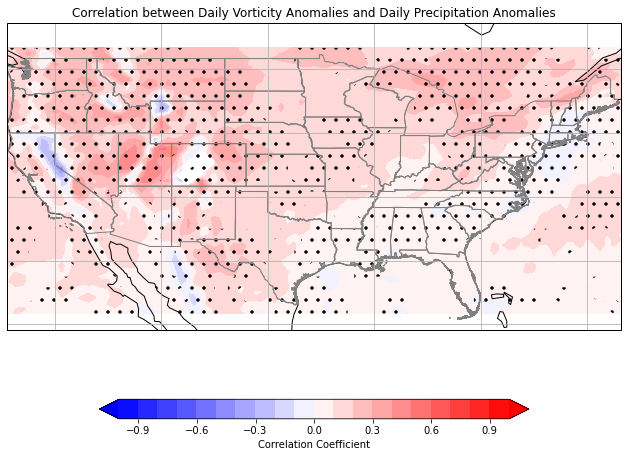

In [47]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=conus_daily_corr
data,lons=add_cyclic_point(data,coord=conus_daily_corr['lon'])
mask_data,lons = add_cyclic_point(mask_sig,coord=conus_daily_corr['lon'])
# Make a filled contour plot
cs=ax.contourf(lons,conus_daily_corr['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')
ax.contourf(lons,conus_daily_corr['lat'],mask_data,[0,1],transform=ccrs.PlateCarree(),colors=None,
           hatches=['.','.'],extend='both',alpha=0)
# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Daily Vorticity Anomalies and Daily Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_daily_withsig')